<a href="https://colab.research.google.com/github/MdAbuSaadMahin/Housing-Price-prediction-/blob/main/CSE422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taking Inputs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [ ]:
housing = pd.read_csv('training data.csv')
compare = pd.read_csv('test sample.csv')
housing.head(100)

FileNotFoundError: ignored

# **Dataset Analysis**

In [ ]:
housing.describe() #? COUNT SHOWS US ALL VALUES OUT OF 1460

,Id,LotArea,YearBuilt,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SalePrice
count,1022.00000,1021.000000,1017.000000,1009.000000,1018.000000,1017.000000,1018.000000,1019.000000,1019.000000,1022.000000
mean,511.50000,10654.404505,1971.545723,1506.571853,1.565815,2.851524,1.048134,0.606477,1.758587,181713.254403
std,295.17029,11313.155791,30.057886,511.206642,0.550400,0.817248,0.227512,0.647799,0.743414,79854.663341
min,1.00000,1300.000000,1880.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,256.25000,7535.000000,1954.000000,1123.000000,1.000000,2.000000,1.000000,0.000000,1.000000,130000.000000
50%,511.50000,9450.000000,1974.000000,1456.000000,2.000000,3.000000,1.000000,1.000000,2.000000,163745.000000
75%,766.75000,11639.000000,2001.000000,1768.000000,2.000000,3.000000,1.000000,1.000000,2.000000,214975.000000
max,1022.00000,215245.000000,2010.000000,4676.000000,3.000000,8.000000,3.000000,3.000000,4.000000,755000.000000


In [ ]:
housing.shape

(1022, 20)

In [ ]:
(housing.isnull().sum())

Id                 0
LotArea            1
Street             0
Alley            957
Utilities         10
Neighborhood       5
BldgType           9
HouseStyle         4
YearBuilt          5
RoofStyle          3
Foundation         5
Electrical         9
GrLivArea         13
FullBath           4
BedroomAbvGr       5
KitchenAbvGr       4
Fireplaces         3
GarageCars         3
SaleCondition      0
SalePrice          0
dtype: int64

# **DATASET PRE PROCESSING**


## **Removing columns which have excessive null values & unnecessary data**

In [ ]:
# Alley has 957 null values so we are removing the colomun alley.
housing.drop(['Alley'], axis=1, inplace=True)

# Id is just serial number which is also not nescessary.
housing.drop(['Id'], axis=1, inplace=True)

housing.shape

(1022, 18)

In [ ]:
(housing.isnull().sum())

LotArea           1
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         5
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea        13
FullBath          4
BedroomAbvGr      5
KitchenAbvGr      4
Fireplaces        3
GarageCars        3
SaleCondition     0
SalePrice         0
dtype: int64

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>],
       [<Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'SalePrice'}>]], dtype=object)

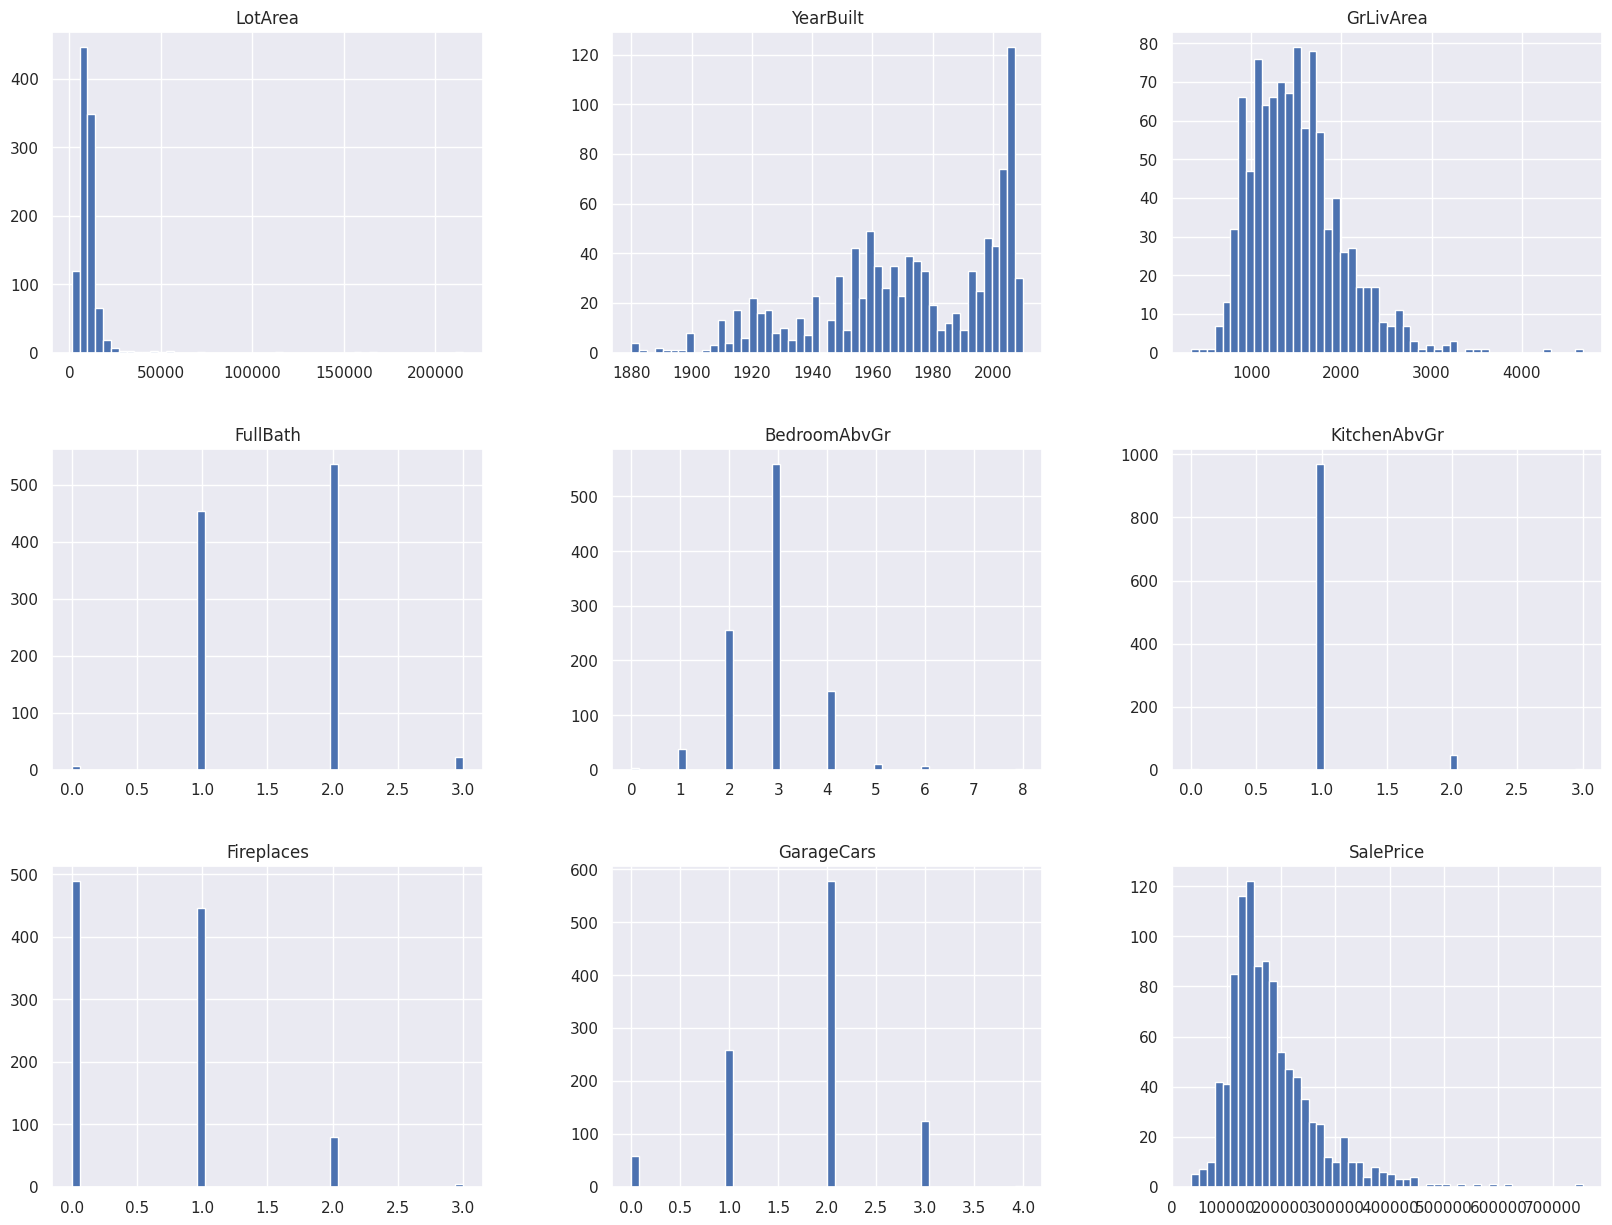

In [ ]:
%matplotlib inline

housing.hist(bins=50,figsize=(20,15))

## **Replaced integer columns with their mean value**

In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')

columns_to_impute = [0, 6, 10, 11, 12, 13, 14, 15]
df_to_impute = housing.iloc[:, columns_to_impute]
imputer1.fit(df_to_impute)
housing_imputed = pd.DataFrame(imputer1.transform(
    df_to_impute), columns=df_to_impute.columns)

housing.iloc[:, columns_to_impute] = housing_imputed

(housing.isnull().sum())

LotArea           0
Street            0
Utilities        10
Neighborhood      5
BldgType          9
HouseStyle        4
YearBuilt         0
RoofStyle         3
Foundation        5
Electrical        9
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
Fireplaces        0
GarageCars        0
SaleCondition     0
SalePrice         0
dtype: int64

## **Replacing String Columns with most frequent valus, Checking Any Negative price exists or not**



In [ ]:
imputer2 = SimpleImputer(strategy='most_frequent')

string_imputed = ['Utilities', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing[string_imputed] = imputer2.fit_transform(housing[string_imputed])

In [ ]:
if (housing['SalePrice'] < 0).any():
    print("Sale Price column has negative values")
else:
    print("Sale Price column does not have negative values")

Sale Price column does not have negative values


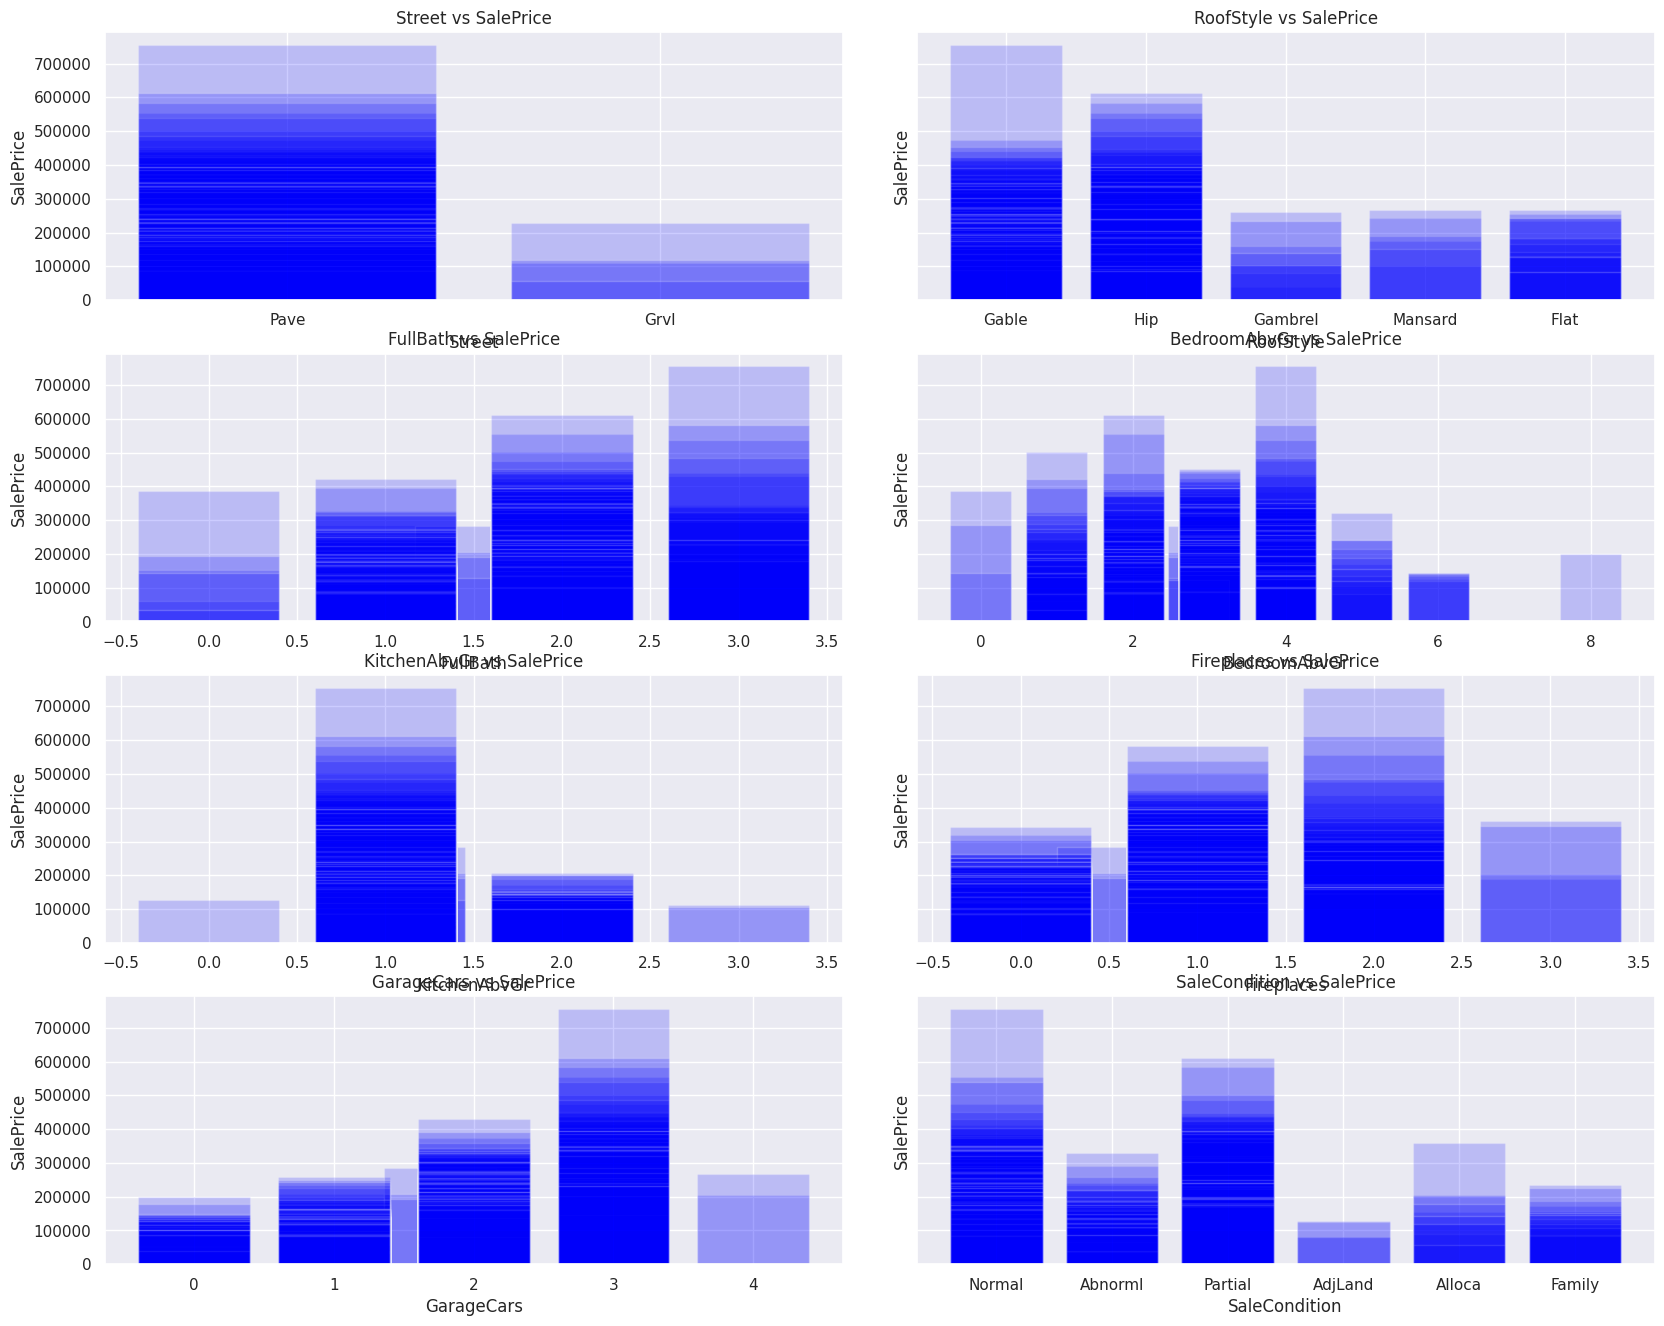

In [ ]:
columns_to_plot = [1, 7, 11, 12, 13, 14, 15, 16]
target = "SalePrice"

figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) %
                        2, 2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(housing.iloc[:, column], housing[target], color='Blue', alpha=0.2)
    axs[i // 2, i % 2].set_xlabel(housing.columns[column])
    axs[i // 2, i % 2].set_ylabel(target)
    axs[i // 2, i % 2].set_title(f'{housing.columns[column]} vs {target}')

figure.subplots_adjust(wspace=0.1, hspace=0.2)

plt.show()

## **Pre Processed data**

In [ ]:
housing.info() #? FOCUS ON THE NON-NULL COUNT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1022 non-null   float64
 1   Street         1022 non-null   object 
 2   Utilities      1022 non-null   object 
 3   Neighborhood   1022 non-null   object 
 4   BldgType       1022 non-null   object 
 5   HouseStyle     1022 non-null   object 
 6   YearBuilt      1022 non-null   float64
 7   RoofStyle      1022 non-null   object 
 8   Foundation     1022 non-null   object 
 9   Electrical     1022 non-null   object 
 10  GrLivArea      1022 non-null   float64
 11  FullBath       1022 non-null   float64
 12  BedroomAbvGr   1022 non-null   float64
 13  KitchenAbvGr   1022 non-null   float64
 14  Fireplaces     1022 non-null   float64
 15  GarageCars     1022 non-null   float64
 16  SaleCondition  1022 non-null   object 
 17  SalePrice      1022 non-null   int64  
dtypes: float

In [ ]:
(housing.isnull().sum())

LotArea          0
Street           0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
YearBuilt        0
RoofStyle        0
Foundation       0
Electrical       0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
SaleCondition    0
SalePrice        0
dtype: int64

In [ ]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             438 non-null    int64  
 1   LotArea        438 non-null    int64  
 2   Street         438 non-null    object 
 3   Alley          26 non-null     object 
 4   Utilities      436 non-null    object 
 5   Neighborhood   436 non-null    object 
 6   BldgType       436 non-null    object 
 7   HouseStyle     436 non-null    object 
 8   YearBuilt      436 non-null    float64
 9   RoofStyle      435 non-null    object 
 10  Foundation     435 non-null    object 
 11  Electrical     434 non-null    object 
 12  GrLivArea      436 non-null    float64
 13  FullBath       436 non-null    float64
 14  BedroomAbvGr   435 non-null    float64
 15  KitchenAbvGr   437 non-null    float64
 16  Fireplaces     437 non-null    float64
 17  GarageCars     437 non-null    float64
 18  SaleCondit

In [ ]:
compare.isnull().sum()

Id                 0
LotArea            0
Street             0
Alley            412
Utilities          2
Neighborhood       2
BldgType           2
HouseStyle         2
YearBuilt          2
RoofStyle          3
Foundation         3
Electrical         4
GrLivArea          2
FullBath           2
BedroomAbvGr       3
KitchenAbvGr       1
Fireplaces         1
GarageCars         1
SaleCondition      1
SalePrice          0
dtype: int64

In [ ]:
print(housing.dtypes) #? SEARCH OBJECT OR STRING

LotArea          float64
Street            object
Utilities         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt        float64
RoofStyle         object
Foundation        object
Electrical        object
GrLivArea        float64
FullBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
Fireplaces       float64
GarageCars       float64
SaleCondition     object
SalePrice          int64
dtype: object


In [ ]:
categorical_cols = ['Street', 'Utilities', 'Neighborhood', 'BldgType',
                    'HouseStyle', 'RoofStyle', 'Foundation', 'Electrical', 'SaleCondition']

housing_encoded = pd.get_dummies(housing, columns=categorical_cols)

In [ ]:
general_dataset = housing_encoded

housing_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1022 non-null   float64
 1   YearBuilt              1022 non-null   float64
 2   GrLivArea              1022 non-null   float64
 3   FullBath               1022 non-null   float64
 4   BedroomAbvGr           1022 non-null   float64
 5   KitchenAbvGr           1022 non-null   float64
 6   Fireplaces             1022 non-null   float64
 7   GarageCars             1022 non-null   float64
 8   SalePrice              1022 non-null   int64  
 9   Street_Grvl            1022 non-null   uint8  
 10  Street_Pave            1022 non-null   uint8  
 11  Utilities_AllPub       1022 non-null   uint8  
 12  Utilities_NoSeWa       1022 non-null   uint8  
 13  Neighborhood_Blmngtn   1022 non-null   uint8  
 14  Neighborhood_Blueste   1022 non-null   uint8  
 15  Neig

## **Standardization of Data**

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(housing_encoded), batch_size):
    scaler.partial_fit(housing_encoded[i:i+batch_size])

X_scaled = scaler.transform(housing_encoded)

X_scaled

array([[-1.95044130e-01,  1.04954213e+00,  4.00691137e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-9.32929546e-02,  1.48626898e-01, -4.81731636e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [ 5.26978623e-02,  9.82807664e-01,  5.50387857e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       ...,
       [-6.76105991e-01,  1.11627659e+00, -1.12637588e-03, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-3.21215587e-01,  1.11627659e+00, -7.37791816e-01, ...,
        -1.17851130e-01,  4.77875909e-01, -3.14523022e-01],
       [-2.87416501e-01,  1.14964382e+00, -5.64458771e-01, ...,
        -1.17851130e-01, -2.09259346e+00,  3.17941750e+00]])

<ipython-input-218-38b0a0afc942>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_before = housing.corr()


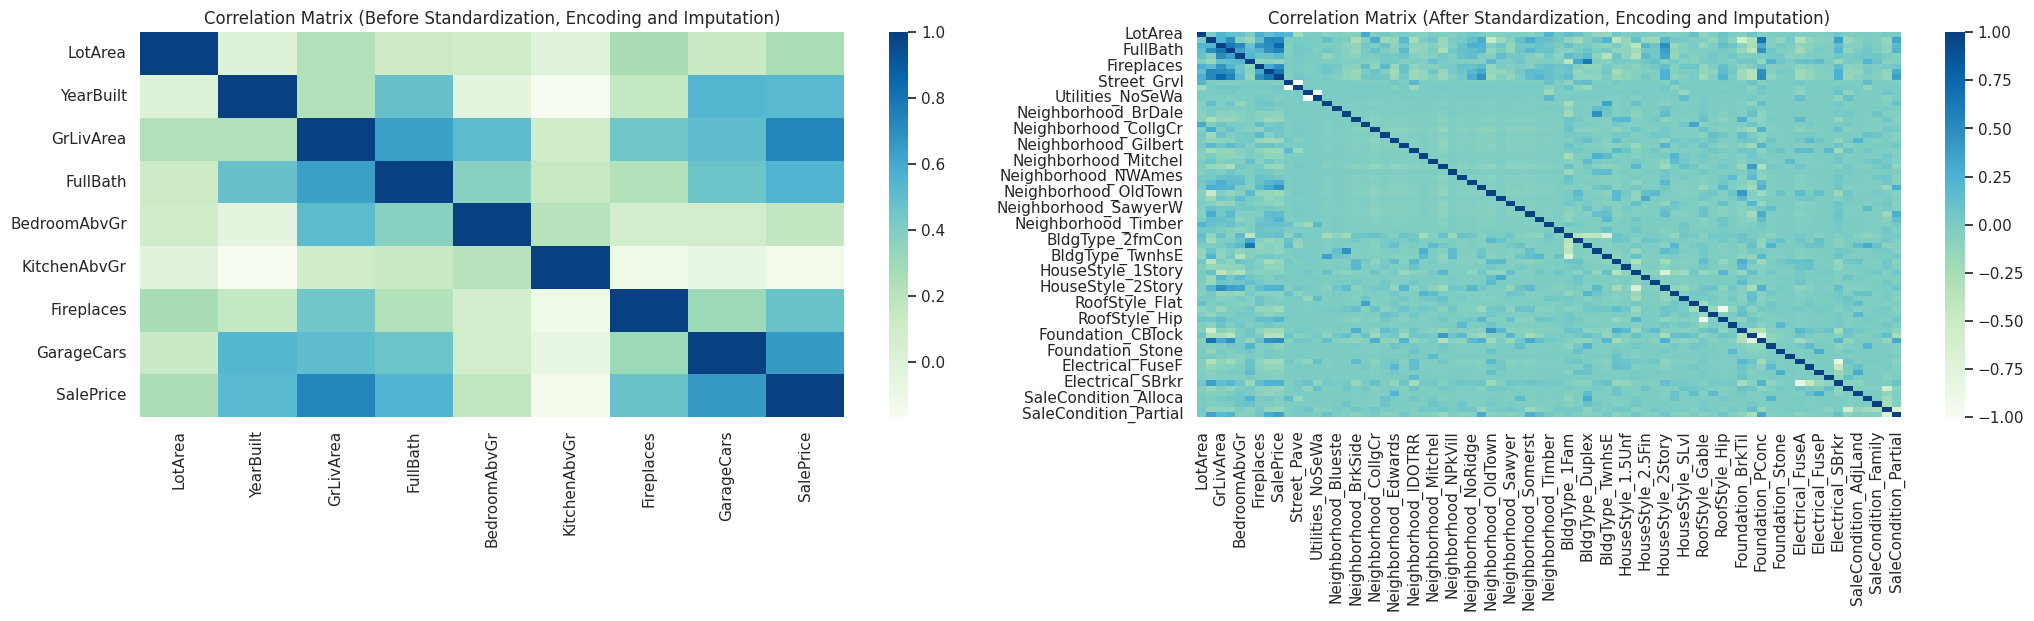

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=housing_encoded.columns)

corr_before = housing.corr()

corr_after = X_scaled_df.corr()

fig, axs = plt.subplots(ncols=2, figsize=(25, 5))
sns.heatmap(corr_before, ax=axs[0],cmap="GnBu")
axs[0].set_title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
sns.heatmap(corr_after, ax=axs[1],cmap="GnBu")
axs[1].set_title('Correlation Matrix (After Standardization, Encoding and Imputation)')
plt.show()

## **Spliting & Checking Features corelation with the sale price**

In [ ]:
X = X_scaled
y = housing_encoded['SalePrice'].to_numpy()

In [ ]:
X_dataframe = pd.DataFrame(X, columns=housing_encoded.columns[:])
y_dataframe = pd.DataFrame(housing_encoded['SalePrice'], columns=['SalePrice'])

corr_matrix = pd.concat([X_dataframe, y_dataframe], axis=1).corr()

correlations = corr_matrix.iloc[-1, :-1]

print(correlations.sort_values(ascending=False).head(5))

SalePrice     1.000000
GrLivArea     0.732663
GarageCars    0.657339
FullBath      0.556940
YearBuilt     0.528285
Name: SalePrice, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_scaled))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
print("Sum of samples in train and test:", len(X_train) + len(X_test))

test_size_example = len(X_test) / len(X_scaled)
print("Test size proportion:", test_size_example)

print('''
Checking if train and test split is successful
''')

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (715, 73)
X_test shape: (307, 73)
y_train shape: (715,)
y_test shape: (307,)
 
Total number of samples: 1022
Number of samples in the training set: 715
Number of samples in the testing set: 307
Sum of samples in train and test: 1022
Test size proportion: 0.30039138943248533

Checking if train and test split is successful

Difference: 0.0003913894324853451


In [ ]:
X = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

if any(np.intersect1d(X_train.index, X_test.index)):
    print("The train and test data is mixed.")
else:
    print("The train and test data is not mixed.")

The train and test data is not mixed.


# **MODELS Training & Testing**

## **Linear Regression**

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)

In [ ]:
residuals = y_train - linreg.predict(X_train)
outlier_threshold = 3*np.std(residuals)
outliers = np.abs(residuals) > outlier_threshold

In [ ]:
linreg_score = 0

if np.all(outliers):
    print("All samples are outliers, cannot fit a linear regression model")
else:
    X_train_cleaned, y_train_cleaned = X_train[~outliers], y_train[~outliers]

    linreg_cleaned = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

    y_pred_cleaned = linreg_cleaned.predict(X_test)

    mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
    rmse_cleaned = np.sqrt(mse_cleaned)
    mae = mean_absolute_error(y_test, y_pred_cleaned)

    r2_score_cleaned = r2_score(y_test, y_pred_cleaned) * 100

    linreg_score = r2_score_cleaned
    linreg_mae = mae

    print(f"Mean Squared Error: {mse_cleaned:.2f}")
    print(f"Root Mean Squared Error: {rmse_cleaned:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(" ")
    print(f"R^2 Score: {r2_score_cleaned:.6f}%")

Mean Squared Error: 8847840.93
Root Mean Squared Error: 2974.53
Mean Absolute Error: 266.14
 
R^2 Score: 99.834110%


In [ ]:
train_accuracy = linreg_cleaned.score(X_train_cleaned, y_train_cleaned)

test_accuracy = linreg_cleaned.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 1.0
Test accuracy: 0.9983410963018079


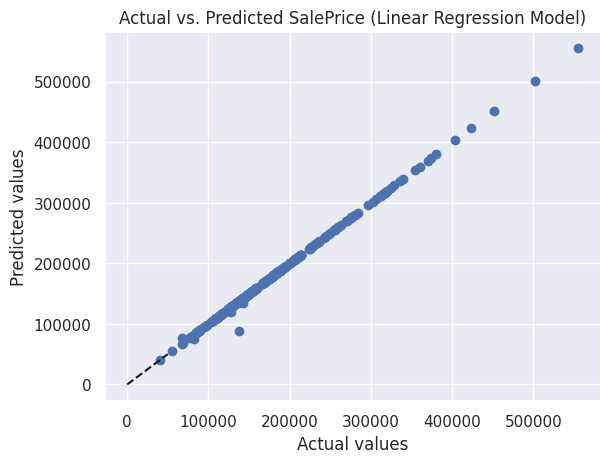

In [ ]:
plt.scatter(y_test, y_pred_cleaned)
plt.plot([0, 50000], [0, 50000], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted SalePrice (Linear Regression Model)')
plt.show()

## **K-Nearest Neighbors (KNN)**

In [ ]:
X = housing_encoded.drop(['SalePrice'], axis=1)
y = housing_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

r_scaler = RobustScaler()
x_train_scaled = r_scaler.fit_transform(X_train)
x_test_scaled = r_scaler.transform(X_test)

x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
rmse_val = []
mse_val = []
for k in range(1, 20):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    rmse_val.append(rmse)
    mse_val.append(mse)
    print(f"Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = {k}:    {mse:.2f} | {rmse:.2f}")

Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 1:    2045926783.07 | 45231.92
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 2:    1640927210.29 | 40508.36
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 3:    1701780743.13 | 41252.65
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 4:    1571022384.26 | 39636.12
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 5:    1423056266.22 | 37723.42
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 6:    1392824901.16 | 37320.57
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 7:    1351029632.33 | 36756.35
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 8:    1371845679.13 | 37038.44
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 9:    1377985053.86 | 37121.22
Mean Squared Error(MSE) | Root Mean Squared Error(RMSE) for k = 10:    1352365655.85 | 36774.52
Mean Squared Error(MSE) | Root Mean Squared Error

Text(0, 0.5, 'RMSE')

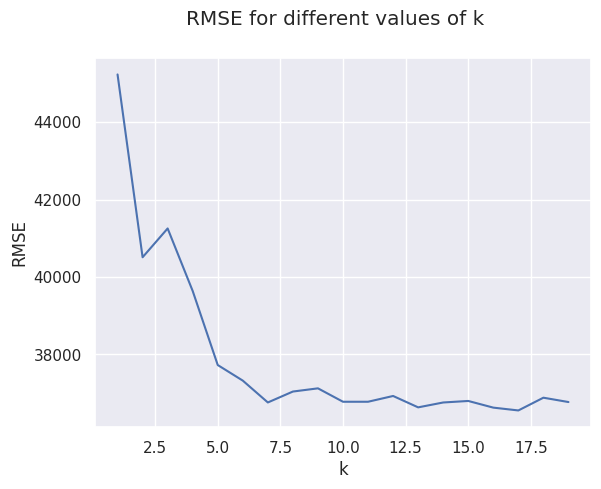

In [ ]:
fig, axs = plt.subplots(1)
fig.suptitle('RMSE for different values of k')
axs.plot(range(1, 20), rmse_val)
axs.set_xlabel('k')
axs.set_ylabel('RMSE')

In [ ]:
optimal_k_rmse = rmse_val.index(min(rmse_val)) + 1
print(f"The optimal value of k based on RMSE is {optimal_k_rmse}")

The optimal value of k based on RMSE is 17


In [ ]:
# Fit the model on the training data using the optimal value of k
k = optimal_k_rmse  # or optimal_k_mse if you prefer
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)

print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 88200.0
Maximum predicted value: 361526.64705882355


In [ ]:
test_rmse = sqrt(mean_squared_error(y_test, y_pred))
test_mse = mean_squared_error(y_test, y_pred)

test_r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)

knn_score = test_r2
knn_mae = mae

print(f"Mean Squared Error: {test_mse:.2f}")
print(f"Root Mean Squared Error: {test_rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {test_r2:.2f}%")

Mean Squared Error: 1335899973.83
Root Mean Squared Error: 36549.97
Mean Absolute Error: 23971.08
 
R^2 score: 74.95%


In [ ]:
train_accuracy = knn_model.score(x_train, y_train)
test_accuracy = knn_model.score(x_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8025361557237727
Test accuracy: 0.7495287919970868


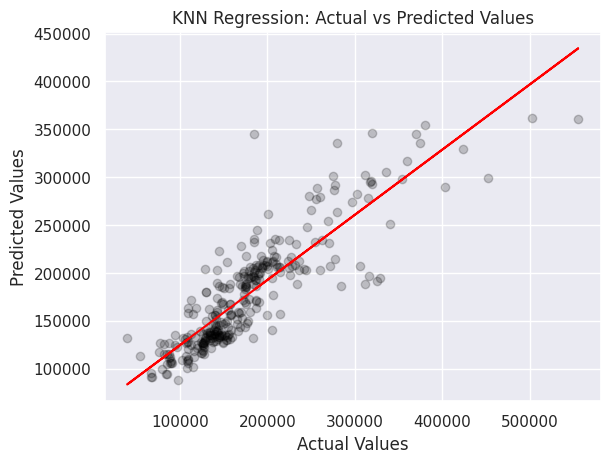

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted Values')
plt.show()

## **Support Vector Machine (SVM)**

In [ ]:
X = housing_encoded.iloc[:, 1:8].values
y = housing_encoded.iloc[:, 8].values

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X)
X_train_scaled , X_test_scaled , y_train, y_test = train_test_split(X_train_scaled , y, test_size=0.3, random_state=42)

In [ ]:
svm_model = SVR(kernel='poly', C= 1000000, coef0=0.1)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

neg_preds = []

for pred in y_pred:
    if pred < 0:
        neg_preds.append(pred)
if len(neg_preds) > 0:
    print("Negative predicted values:", neg_preds)
else:
    print("No negative predicted values")

min_pred = min(y_pred)
max_pred = max(y_pred)
print("Minimum predicted value:", min_pred)
print("Maximum predicted value:", max_pred)

No negative predicted values
Minimum predicted value: 41092.82307745845
Maximum predicted value: 533652.3280529052


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)*100

svm_score = r2
svm_mae = mae

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(" ")
print(f"R^2 score: {r2:.2f}%")

Mean Squared Error: 1300059448.57
Root Mean Squared Error: 36056.34
Mean Absolute Error: 24348.41
 
R^2 score: 75.62%


In [ ]:
train_accuracy = svm_model.score(X_train_scaled, y_train)
test_accuracy = svm_model.score(X_test_scaled, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.8858850293453449
Test accuracy: 0.7562486211995784


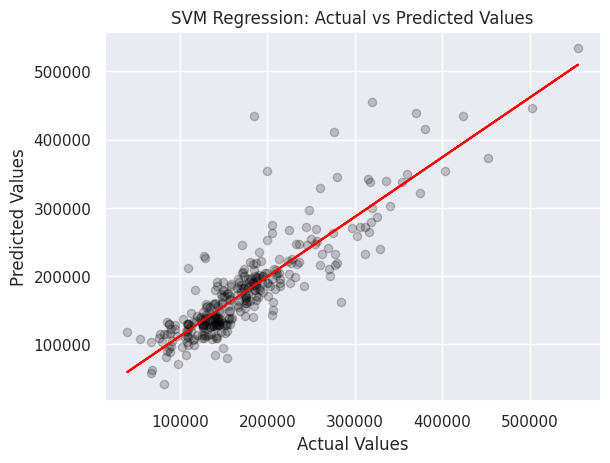

In [ ]:
plt.scatter(y_test, y_pred, color='black', alpha=0.2)

coefficients = np.polyfit(y_test, y_pred, 1)
polynomial = np.poly1d(coefficients)
plt.plot(y_test, polynomial(y_test), color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression: Actual vs Predicted Values')
plt.show()

# **Output Analysis**

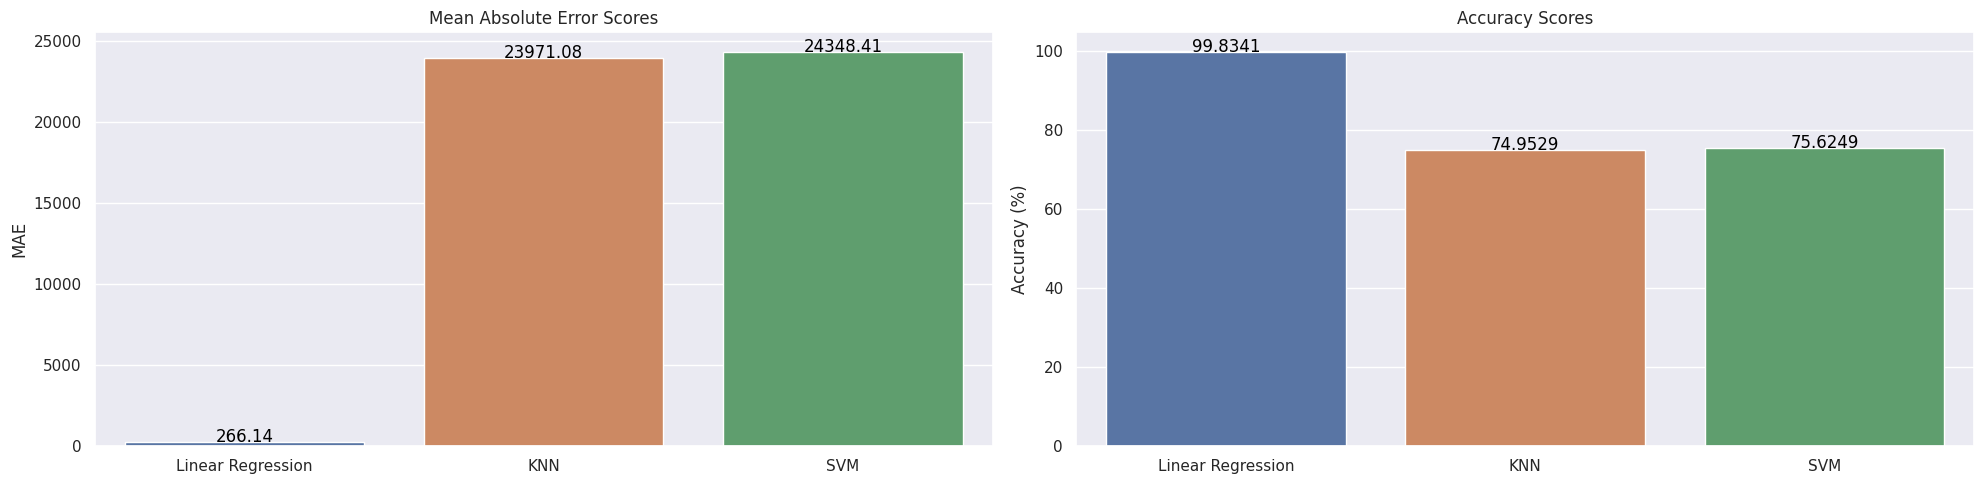

In [ ]:
models = ['Linear Regression', 'KNN', 'SVM']
mae_scores = [linreg_mae, knn_mae, svm_mae]
accuracy_scores = [linreg_score, knn_score, svm_score]

sns.set(style="darkgrid")

# Create a Seaborn bar chart with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.barplot(x=models, y=mae_scores, ax=axs[0])
axs[0].set_title('Mean Absolute Error Scores')
axs[0].set_ylabel('MAE')

for i, v in enumerate(mae_scores):
    axs[0].text(i, v, f"{v:.2f}", color='black', ha="center")


sns.barplot(x=models, y=accuracy_scores, ax=axs[1])
axs[1].set_title('Accuracy Scores')
axs[1].set_ylabel('Accuracy (%)')

for i, v in enumerate(accuracy_scores):
    axs[1].text(i, v, f"{v:.4f}", color='black', ha="center")

fig.tight_layout()
plt.show()

In [ ]:
print(F'''The models prediction accuracy are as follows:

Linear Regression: {linreg_score:.4f}%
K-Nearest Neighbors: {knn_score:.4f}%
Support Machine Vector: {svm_score:.4f}%
''')

The models prediction accuracy are as follows:

Linear Regression: 99.8341%
K-Nearest Neighbors: 74.9529%
Support Machine Vector: 75.6249%

